#PROJECT 1 Part 1 (Week 1)

In [ ]:
import pandas as pd
dominic = "/content/drive/MyDrive/Coding Dojo PH Bootcamp/02 Week 2: Pandas/Dataset Week 2/bostonHousing1978.csv"

In [ ]:
#loading Sales Prediction CSV
github = "/content/drive/MyDrive/Coding Dojo PH Bootcamp/02 Week 2: Pandas/Dataset Week 2/sales_predictions.csv"
git = pd.read_csv(github)
git.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


#PROJECT 1 Part 2 (Week 2)

##DATA CLEANING

###Data Structures

1) How many rows and columns?

In [ ]:
#getting data points
git.shape

(8523, 12)

2) What are the datatypes of each variable?

In [ ]:
#getting information about the data
git.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical Data
*   Item_Identifier
*   Item_Fat_Content
*   Item_Type
*   Outlet_Identifier
*   Outlet_Size
*   Outlet_Type
*   Outlet_Establishment_Year

Numerical Data
*   Item_Weight
*   Item_Visibility
*   Item_MRP
*   Item_Outlet_Sales

Ordnial Data
*   Outlet_Location_Type



In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Coding Dojo PH Bootcamp/BELT EXAMS Template/Copy of Mod_employee_attrition - Temp employee_attrition.csv")

###Checking Duplicates

3) Are there duplicates? If so, drop any duplicates.

In [ ]:
#checking duplicates and dropping duplicates if there is any
git_duplicate = git.duplicated().sum()
if git_duplicate == 0:
  print("No Duplicates") 
else:
  duplicated_data = git.duplicated().sum()
  print("Dropped {} duplicated data ".format(duplicated_data))
  git.drop_duplicates(inplace=True)

No Duplicates


###Checking for missing values 4,5 and 6
4) Identify missing values.

5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

In [ ]:
#checking for missing values using .isnull().sum()
git.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

missing values in Item_Weight and Outlet_Size

In [ ]:
#getting summary of descriptive statistics
git["Item_Weight"].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [ ]:
#getting median
git["Item_Weight"].median()

12.6

In [ ]:
#getting mode
git["Item_Weight"].mode()

0    12.15
dtype: float64

IMPUTING VALUES of "Item_Weight" Explanation

Base on the measure of central tendency(mean, median and mode) tha data is in normal distribution so i will just replace temporarily the missing values with the average item weight

In [ ]:
#replacing the missing values in the item weight with the average value(mean)
average = git["Item_Weight"].mean()
git["Item_Weight"].fillna(average, inplace=True)


In [ ]:
#rechecking for missing values
git.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

missing values in Outlet_Size

In [ ]:
#getting missing data percentage
missing_data = git["Outlet_Size"].isna().sum()
total_rows =  git.shape[0]

missing_data_percentage = missing_data / total_rows
missing_data_percentage*100

28.27642848762173

Base on the rule of thumb, limit the dropped data to 5% of overall dataset 

Since data is more than 5% we cannot drop the data, for now I will temporarily flag the data and fill in missing values with "Missing".

In [ ]:
#replacing missing values with "Missing"
git["Outlet_Size"].fillna("Missing",inplace=True)

In [ ]:
#rechecking for missing values
git.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

6).Confirm that there are no missing values after addressing them.

 No more missing values upon re checking




###Checking any inconsistent categories

7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 

In [ ]:
#checking unique identifier
git.nunique()

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [ ]:
#getting value counts of column "Item_Fat_Content"
git["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Base on checking using value counts, the "Item_Fat_Content" has incosistency

We can see data inconsistency in column Item Fat Content, LF should be Low Fat, reg should be Regular and low fat is in lower case.

In [ ]:
#getting value counts of column "Item_Type"
git["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

no data inconsistency

In [ ]:
#getting value counts of column "Outlet_Type"
git["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

no data inconsistency

In [ ]:
#correcting and replacing data inconsistency
git["Item_Fat_Content"] = git["Item_Fat_Content"].replace(["LF","low fat"],"Low Fat")
git["Item_Fat_Content"] = git["Item_Fat_Content"].replace(["reg"],"Regular")


In [ ]:
#rechecking data inconsistency
git["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

###Summary Statistics of numerical data
8) For any numerical columns, obtain the summary statistics of each (min, max, mean)

Numerical Data:

  Item_Weight

  Item_Visibility

  Item_MRP

  Item_Outlet_Sales

In [ ]:
git[["Item_Weight",
     "Item_Visibility",
     "Item_MRP",
     "Item_Outlet_Sales"]].describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,2181.29
std,4.23,0.05,62.28,1706.50
min,4.56,0.00,31.29,33.29
25%,9.31,0.03,93.83,834.25
50%,12.86,0.05,143.01,1794.33
75%,16.00,0.09,185.64,3101.30
max,21.35,0.33,266.89,13086.96


Base on .describe() the data seems normal in each column except for Item_Outlet_Sales which is the maximum value is 13086.96, we can investigate on that later.

#PROJECT 1 - Part 3 (Week 3)

## DATA VISUALIZATION

###Histogram to view the distributions of various features in your dataset.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#displaying git dataframe
git.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
#getting shape of our dataset
git.shape

(8523, 12)

In [ ]:
#getting value counts of Outlet Type
git["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [ ]:
#creating filter for each type of outlet
st1 = git["Outlet_Type"] == "Supermarket Type1"
st2 = git["Outlet_Type"] == "Supermarket Type2"
st3 = git["Outlet_Type"] == "Supermarket Type3"
grocery_store = git["Outlet_Type"] == "Grocery Store"


I have created a filter for each type of outlet so i can distinguished difference between this outlets

In [ ]:
#slicing data frame
outlet_st1 = git.loc[st1]


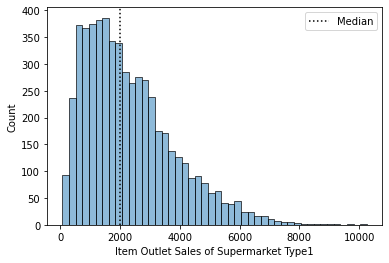

In [ ]:
#plotting histogram for Supermarket Type1
sns.histplot(data=git.loc[st1, ["Item_Outlet_Sales"]],y=None)
plt.axvline(outlet_st1['Item_Outlet_Sales'].median(), color="k", ls=":", label=f"Median={round(git['Item_Outlet_Sales'].median(),2)}")
plt.xlabel("Item Outlet Sales of Supermarket Type1")
plt.legend(["Median"])



In [ ]:
#getting desciptive statistics of Item_Outlet_Sales for Supermarket Type 1
outlet_st1[["Item_Outlet_Sales"]].describe()

,Item_Outlet_Sales
count,5577.000000
mean,2316.181148
std,1515.965558
min,73.238000
25%,1151.168200
50%,1990.742000
75%,3135.918000
max,10256.649000


The histogram above shows that the distribution is positively skewed or skewed to the right distribution so we will use the median as the measure of central tendency.

The median sale price is around 1900, base on the .describe() function

In [ ]:
#slicing data frame
outlet_st2 = git.loc[st2]

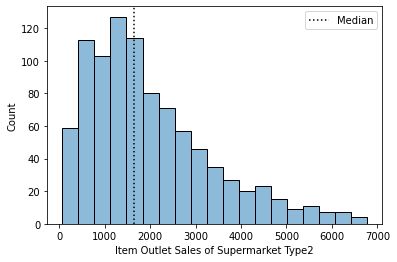

In [ ]:
#plotting histogram for Supermarket Type2
sns.histplot(data=git.loc[st2, ["Item_Outlet_Sales"]],y=None)
plt.axvline(outlet_st2["Item_Outlet_Sales"].median(), color="k", ls=":", label=f"Median={round(git['Item_Outlet_Sales'].median(),2)}")
plt.xlabel("Item Outlet Sales of Supermarket Type2")
plt.legend(["Median"])



In [ ]:
#getting desciptive statistics of Item_Outlet_Sales for Supermarket Type 1
outlet_st2[["Item_Outlet_Sales"]].describe()

,Item_Outlet_Sales
count,928.000000
mean,1995.498739
std,1375.932889
min,69.243200
25%,981.555650
50%,1655.178800
75%,2702.648650
max,6768.522800


The histogram above shows that the distribution is positively skewed or skewed to the right distribution so we will use the median as the measure of central tendency.

The median sale price is around 1600, base on the .describe() function

In [ ]:
#slicing data frame
outlet_st3 = git.loc[st3]

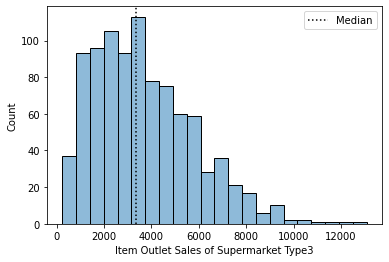

In [ ]:
#plotting histogram for Supermarket Type3
sns.histplot(data=git.loc[st3, ["Item_Outlet_Sales"]],y=None)
plt.axvline(outlet_st3["Item_Outlet_Sales"].median(), color="k", ls=":", label=f"Median={round(git['Item_Outlet_Sales'].median(),2)}")
plt.xlabel("Item Outlet Sales of Supermarket Type3")
plt.legend(["Median"])



In [ ]:
#getting desciptive statistics of Item_Outlet_Sales for Supermarket Type 1
outlet_st3[["Item_Outlet_Sales"]].describe()

,Item_Outlet_Sales
count,935.000000
mean,3694.038558
std,2127.760054
min,241.685400
25%,2044.338900
50%,3364.953200
75%,4975.523400
max,13086.964800


The histogram above shows that the distribution is positively skewed or skewed to the right distribution so we will use the median as the measure of central tendency.

The median sale price is around 3300, base on the .describe() function

In [ ]:
#slicing data frame
outlet_grocery = git.loc[grocery_store]

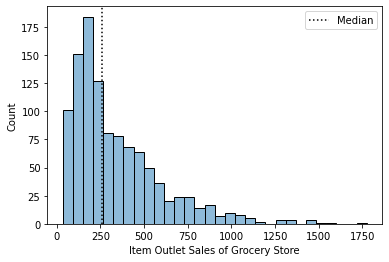

In [ ]:
#plotting histogram for Grocery Store
sns.histplot(data=git.loc[grocery_store, ["Item_Outlet_Sales"]],y=None)
plt.axvline(outlet_grocery["Item_Outlet_Sales"].median(), color="k", ls=":", label=f"Median={round(git['Item_Outlet_Sales'].median(),2)}")
plt.xlabel("Item Outlet Sales of Grocery Store")
plt.legend(["Median"])



In [ ]:
#getting desciptive statistics of Item_Outlet_Sales for grocery store
outlet_grocery[["Item_Outlet_Sales"]].describe()

,Item_Outlet_Sales
count,1083.000000
mean,339.828500
std,260.851582
min,33.290000
25%,153.799800
50%,256.998800
75%,458.736200
max,1775.688600


The histogram above shows that the distribution is positively skewed or skewed to the right distribution so we will use the median as the measure of central tendency.

The median sale price is around 256, base on the .describe() function

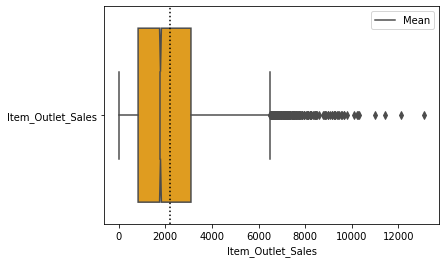

In [ ]:
#plotting boxplot for Item_Outlet_Sales column
df = git.loc[:,"Item_Outlet_Sales"]
sns.boxplot(data=git.loc[:, ["Item_Outlet_Sales"]],y=None, notch=True, orient="horizontal", color="orange", whis=1.5)
plt.axvline(git['Item_Outlet_Sales'].mean(), color="k", ls=":", label=f"Mean={round(git['Item_Outlet_Sales'].mean(),2)}")
plt.xlabel("Item_Outlet_Sales")
plt.legend(["Mean"])

In [ ]:
#getting descriptive statistics summary of Item_Outlet_Sales column
git["Item_Outlet_Sales"].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

First Quartile (Q1) = 834

Third Quartile (Q3) = 3,101

Interquartile Range (IQR) = Q3 - Q1 = 2,267

1.5 * IQR = 3,400

'Minimum' (before outliers) is Q1 - 3,400 = -2,566

'Maximum' (before outliers) is Q3 + 3,400 = 6,501


The boxplot and describe() function above shows that the median outlet sales is  1,794, most of the outlet sales falls between 834 to 3,101. 

There are no outliers on the left whisker but on the right after the 6,501 maximum value (before outliers), we can see that there are outliers. The outliers on the right falls between 6,501 to 13,086.

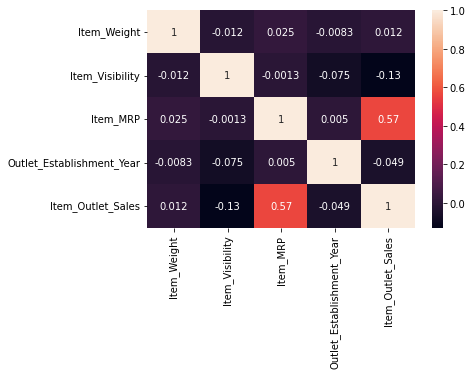

In [ ]:
#getting correlation between each numerical values in our dataset
sns.heatmap(git.corr(), annot=True)

we can see in the heatmap that the lighter the color the higher the correlation.

In the heatmap above the Item_MRP and Item_Outlet_Sales is medium correlated with a correlation coefficient of 0.57. 